<a href="https://colab.research.google.com/github/sebekpro/python-ds/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [2]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.2


### <a name='a2'></a> Załadowanie danych

In [30]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-10-22 to 2019-10-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-22,188.3500,191.5201,186.9750,189.7000,29650593
2024-10-21,188.0500,189.4600,186.4000,189.0700,24639393
2024-10-18,187.1500,190.7400,186.2800,188.9900,37417670
2024-10-17,188.2200,188.9400,186.0000,187.5300,25039414
2024-10-16,187.0500,187.7800,185.6100,186.8900,23456812
...,...,...,...,...,...
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812


In [6]:
df.head(6)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812
2024-10-15,187.63,188.4100,184.580,187.69,32178925


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812


In [9]:
df.tail()

,open,high,low,close,volume
Date,,,,,
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040


In [10]:
df.tail(10)

,open,high,low,close,volume
Date,,,,,
2019-11-07,90.1880,90.2950,89.1740,89.4100,53021720
2019-11-06,90.0500,90.1250,89.4290,89.7885,40595660
2019-11-05,90.4580,90.5125,89.7000,90.0855,37710860
2019-11-04,90.0505,90.7530,90.0505,90.2330,55438440
2019-11-01,89.4005,89.8725,89.2605,89.5720,55807080
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020


In [11]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [12]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812


In [13]:
df.describe()

,open,high,low,close,volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,142.184237,143.918020,140.336496,142.153536,6.933273e+07
std,31.131997,31.221832,30.901208,31.040361,3.385125e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,115.675000,117.791500,113.795000,115.530000,4.764152e+07
50%,150.725000,153.074500,148.360000,150.440000,6.078330e+07
75%,167.477750,168.775750,165.275500,167.153500,8.220111e+07
max,200.090000,201.200000,199.045000,200.000000,3.113457e+08


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1256.0,1.421842e+02,3.113200e+01,8.207550e+01,1.156750e+02,1.507250e+02,1.674778e+02,2.000900e+02
high,1256.0,1.439180e+02,3.122183e+01,8.348000e+01,1.177915e+02,1.530745e+02,1.687758e+02,2.012000e+02
low,1256.0,1.403365e+02,3.090121e+01,8.130160e+01,1.137950e+02,1.483600e+02,1.652755e+02,1.990450e+02
close,1256.0,1.421535e+02,3.104036e+01,8.182000e+01,1.155300e+02,1.504400e+02,1.671535e+02,2.000000e+02
volume,1256.0,6.933273e+07,3.385125e+07,1.762674e+07,4.764152e+07,6.078330e+07,8.220111e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [15]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812
2024-10-15,187.63,188.4100,184.580,187.69,32178925
2024-10-14,189.78,189.8300,187.360,187.54,22614407
2024-10-11,186.63,189.9284,186.300,188.82,25751557
2024-10-10,187.13,188.1340,185.830,186.65,27785043


In [16]:
df['open']

,open
Date,
2024-10-22,188.35
2024-10-21,188.05
2024-10-18,187.15
2024-10-17,188.22
2024-10-16,187.05
2024-10-15,187.63
2024-10-14,189.78
2024-10-11,186.63
2024-10-10,187.13


In [17]:
df.open

,open
Date,
2024-10-22,188.35
2024-10-21,188.05
2024-10-18,187.15
2024-10-17,188.22
2024-10-16,187.05
2024-10-15,187.63
2024-10-14,189.78
2024-10-11,186.63
2024-10-10,187.13


In [18]:
df[['open']]

,open
Date,
2024-10-22,188.35
2024-10-21,188.05
2024-10-18,187.15
2024-10-17,188.22
2024-10-16,187.05
2024-10-15,187.63
2024-10-14,189.78
2024-10-11,186.63
2024-10-10,187.13


In [19]:
df[['open', 'close']]

,open,close
Date,,
2024-10-22,188.35,189.70
2024-10-21,188.05,189.07
2024-10-18,187.15,188.99
2024-10-17,188.22,187.53
2024-10-16,187.05,186.89
2024-10-15,187.63,187.69
2024-10-14,189.78,187.54
2024-10-11,186.63,188.82
2024-10-10,187.13,186.65


In [20]:
df.iloc[:, 0]

,open
Date,
2024-10-22,188.35
2024-10-21,188.05
2024-10-18,187.15
2024-10-17,188.22
2024-10-16,187.05
2024-10-15,187.63
2024-10-14,189.78
2024-10-11,186.63
2024-10-10,187.13


In [21]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-10-22,188.35,189.70
2024-10-21,188.05,189.07
2024-10-18,187.15,188.99
2024-10-17,188.22,187.53
2024-10-16,187.05,186.89
2024-10-15,187.63,187.69
2024-10-14,189.78,187.54
2024-10-11,186.63,188.82
2024-10-10,187.13,186.65


In [22]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-10-22,189.70,29650593
2024-10-21,189.07,24639393
2024-10-18,188.99,37417670
2024-10-17,187.53,25039414
2024-10-16,186.89,23456812
2024-10-15,187.69,32178925
2024-10-14,187.54,22614407
2024-10-11,188.82,25751557
2024-10-10,186.65,27785043


In [23]:
df.iloc[:, -1]

,volume
Date,
2024-10-22,29650593
2024-10-21,24639393
2024-10-18,37417670
2024-10-17,25039414
2024-10-16,23456812
2024-10-15,32178925
2024-10-14,22614407
2024-10-11,25751557
2024-10-10,27785043


In [24]:
df.iloc[:, [-1]]

,volume
Date,
2024-10-22,29650593
2024-10-21,24639393
2024-10-18,37417670
2024-10-17,25039414
2024-10-16,23456812
2024-10-15,32178925
2024-10-14,22614407
2024-10-11,25751557
2024-10-10,27785043


In [25]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-10-22,186.975,189.70,29650593
2024-10-21,186.400,189.07,24639393
2024-10-18,186.280,188.99,37417670
2024-10-17,186.000,187.53,25039414
2024-10-16,185.610,186.89,23456812
2024-10-15,184.580,187.69,32178925
2024-10-14,187.360,187.54,22614407
2024-10-11,186.300,188.82,25751557
2024-10-10,185.830,186.65,27785043


### <a name='a5'></a>  Selekcja wierszy

In [26]:
df

,open,high,low,close,volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670
2024-10-17,188.22,188.9400,186.000,187.53,25039414
2024-10-16,187.05,187.7800,185.610,186.89,23456812
2024-10-15,187.63,188.4100,184.580,187.69,32178925
2024-10-14,189.78,189.8300,187.360,187.54,22614407
2024-10-11,186.63,189.9284,186.300,188.82,25751557
2024-10-10,187.13,188.1340,185.830,186.65,27785043


In [27]:
df.iloc[0]

,2024-10-22
open,1.883500e+02
high,1.915201e+02
low,1.869750e+02
close,1.897000e+02
volume,2.965059e+07


In [28]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-10-22,188.35,191.5201,186.975,189.70,29650593
2024-10-21,188.05,189.4600,186.400,189.07,24639393
2024-10-18,187.15,190.7400,186.280,188.99,37417670


In [81]:
df.loc['2024-10-16': '2024-10-21']

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2024-10-16,187.05,187.78,185.61,186.89,23456812,187.69,-0.004262,False,186.970,747.33
2024-10-17,188.22,188.94,186.00,187.53,25039414,186.89,0.003424,True,187.875,750.69
2024-10-18,187.15,190.74,186.28,188.99,37417670,187.53,0.007785,True,188.070,753.16
2024-10-21,188.05,189.46,186.40,189.07,24639393,188.99,0.000423,True,188.560,752.98


In [37]:
df

,open,high,low,close,volume
Date,,,,,
2024-10-21,79.94,80.57,79.550,80.46,11238726
2024-10-18,80.53,80.55,78.800,79.16,14186721
2024-10-17,79.92,80.88,79.410,79.90,27373196
2024-10-16,82.93,83.48,81.620,81.90,12398522
2024-10-15,84.77,84.77,82.650,83.20,14858455
2024-10-14,85.64,86.18,84.180,84.94,14752430
2024-10-11,82.00,87.00,81.860,86.34,57290484
2024-10-10,77.65,78.24,76.900,77.92,15033626
2024-10-09,76.00,77.96,75.955,77.87,17251051


In [42]:
df.index = pd.to_datetime(df.index)
df_sorted = df.sort_index(ascending=True)
result = df_sorted.loc['2024-10-16':'2024-10-21']
print(result)

             open   high    low  close    volume
Date                                            
2024-10-16  82.93  83.48  81.62  81.90  12398522
2024-10-17  79.92  80.88  79.41  79.90  27373196
2024-10-18  80.53  80.55  78.80  79.16  14186721
2024-10-21  79.94  80.57  79.55  80.46  11238726


### <a name='a6'></a> Obliczanie nowych kolumn

In [49]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-10-21 to 2019-10-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [50]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-21,79.94,80.57,79.55,80.46,11238726
2024-10-18,80.53,80.55,78.80,79.16,14186721
2024-10-17,79.92,80.88,79.41,79.90,27373196
2024-10-16,82.93,83.48,81.62,81.90,12398522
2024-10-15,84.77,84.77,82.65,83.20,14858455


In [51]:
df.describe()

,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,43.682360,44.488487,42.849705,43.680987,2.524856e+07
std,15.464492,15.561459,15.308159,15.422203,1.746143e+07
min,15.960000,17.800000,13.710000,14.820000,5.200356e+06
25%,31.357500,32.026250,30.718600,31.405000,1.609777e+07
50%,40.244400,40.955000,39.370000,40.175000,2.116482e+07
75%,53.302500,54.287500,51.940000,53.105000,2.915562e+07
max,85.640000,87.000000,84.180000,86.340000,3.642612e+08


In [52]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-21,79.94,80.57,79.55,80.46,11238726
2024-10-18,80.53,80.55,78.80,79.16,14186721
2024-10-17,79.92,80.88,79.41,79.90,27373196


In [55]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()
df['Summarize'] = (df.Open + df.High + df.Low + df.Close)
df.head()

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN,NaN,False,86.47200,345.9045
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942,True,88.12850,352.3170
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086,False,88.43800,353.5165
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803,True,88.50575,354.0865
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871,False,88.81625,355.8065


In [34]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700


In [35]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Close_shift
Date,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995


In [40]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Close_shift,Daily_Change
Date,,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN,NaN
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871


In [37]:
del df['Daily_Change']

In [38]:
df.head()

,Open,High,Low,Close,Volume,Close_shift
Date,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995


In [41]:
df.Daily_Change.min()

-0.14048798030374288

In [42]:
df.Daily_Change.max()

0.13535859873528944

<Axes: >

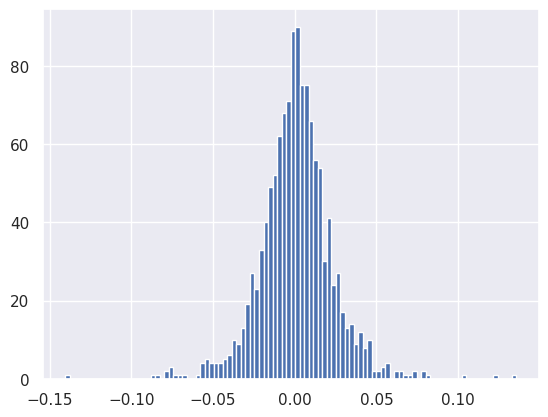

In [43]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

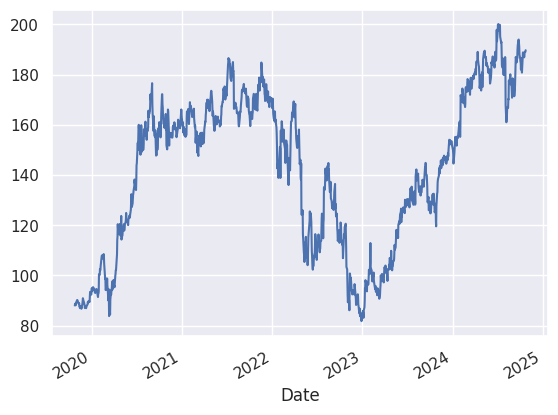

In [44]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [45]:
df

,Open,High,Low,Close,Volume,Close_shift,Daily_Change
Date,,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN,NaN
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871
...,...,...,...,...,...,...,...
2024-10-16,187.0500,187.7800,185.6100,186.8900,23456812,187.6900,-0.004262
2024-10-17,188.2200,188.9400,186.0000,187.5300,25039414,186.8900,0.003424
2024-10-18,187.1500,190.7400,186.2800,188.9900,37417670,187.5300,0.007785


In [57]:
df['Daily_Change_Mask > 0'] = df.Daily_Change > 0
df.head()

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN,NaN,False,86.47200,345.9045
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942,True,88.12850,352.3170
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086,False,88.43800,353.5165
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803,True,88.50575,354.0865
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871,False,88.81625,355.8065


In [58]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942,True,88.12850,352.3170
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803,True,88.50575,354.0865
2019-11-01,89.4005,89.8725,89.2605,89.5720,55807080,88.8330,0.008319,True,89.48625,358.1055
2019-11-04,90.0505,90.7530,90.0505,90.2330,55438440,89.5720,0.007380,True,90.14175,361.0870
2019-11-12,88.7330,89.3110,88.5955,88.9000,40778500,88.5825,0.003584,True,88.81650,355.5395
...,...,...,...,...,...,...,...,...,...,...
2024-10-15,187.6300,188.4100,184.5800,187.6900,32178925,187.5400,0.000800,True,187.66000,748.3100
2024-10-17,188.2200,188.9400,186.0000,187.5300,25039414,186.8900,0.003424,True,187.87500,750.6900
2024-10-18,187.1500,190.7400,186.2800,188.9900,37417670,187.5300,0.007785,True,188.07000,753.1600


In [59]:
df_positive.Daily_Change.mean()

0.016260322555782865

In [60]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086,False,88.43800,353.5165
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871,False,88.81625,355.8065
2019-11-05,90.4580,90.5125,89.7000,90.0855,37710860,90.2330,-0.001635,False,90.27175,360.7560
2019-11-06,90.0500,90.1250,89.4290,89.7885,40595660,90.0855,-0.003297,False,89.91925,359.3925
2019-11-07,90.1880,90.2950,89.1740,89.4100,53021720,89.7885,-0.004215,False,89.79900,359.0670
...,...,...,...,...,...,...,...,...,...,...
2024-10-02,184.4400,186.6000,184.0400,184.7600,23704056,185.1300,-0.001999,False,184.60000,739.8400
2024-10-03,183.0450,183.4400,180.8750,181.9600,30204302,184.7600,-0.015155,False,182.50250,729.3200
2024-10-07,182.9500,183.6000,180.2500,180.8000,42364201,186.5100,-0.030615,False,181.87500,727.6000


In [61]:
 df_negative.Daily_Change.mean()

-0.015865208822554457

In [62]:
df.Close == df.High

,0
Date,
2019-10-25,False
2019-10-28,False
2019-10-29,False
2019-10-30,False
2019-10-31,False
...,...
2024-10-16,False
2024-10-17,False
2024-10-18,False


In [63]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-12-23,89.413,89.6500,89.2255,89.6500,42749860,89.325,0.003638,True,89.53150,357.9385
2020-01-02,93.750,94.9005,93.2075,94.9005,80718200,92.392,0.027151,True,94.32525,376.7585
2020-05-29,120.797,122.1180,119.9100,122.1180,70586580,120.055,0.017184,True,121.45750,484.9430
2021-04-09,165.235,168.6100,164.4450,168.6100,86829460,164.965,0.022096,True,166.92250,666.9000
2022-11-30,92.470,96.5400,91.5250,96.5400,102805806,92.420,0.044579,True,94.50500,377.0750
2024-06-06,181.745,185.0000,181.4900,185.0000,31371151,181.280,0.020521,True,183.37250,733.2350


In [64]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2022-01-05,166.883,167.126,164.357,164.357,64302720,167.522,-0.018893,False,165.620,662.723
2024-03-21,179.988,181.415,178.150,178.150,32824320,178.150,0.000000,False,179.069,717.703
2024-04-04,184.000,185.100,180.000,180.000,41624261,182.410,-0.013212,False,182.000,729.100


In [68]:
df.index > '2024-01-01'

array([False, False, False, ...,  True,  True,  True])

In [71]:
df[df.index > '2023-11-01']

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2023-11-02,138.73,138.8100,136.4700,138.07,52236693,137.00,0.007810,True,138.400,552.0800
2023-11-03,138.99,139.4900,137.4500,138.60,44059805,138.07,0.003839,True,138.795,554.5300
2023-11-06,138.76,140.7300,138.3600,139.74,44970417,138.60,0.008225,True,139.250,557.5900
2023-11-07,140.55,143.3700,140.5000,142.71,53553537,139.74,0.021254,True,141.630,567.1300
2023-11-08,142.97,143.1200,141.2183,142.08,44521658,142.71,-0.004415,False,142.525,569.3883
...,...,...,...,...,...,...,...,...,...,...
2024-10-16,187.05,187.7800,185.6100,186.89,23456812,187.69,-0.004262,False,186.970,747.3300
2024-10-17,188.22,188.9400,186.0000,187.53,25039414,186.89,0.003424,True,187.875,750.6900
2024-10-18,187.15,190.7400,186.2800,188.99,37417670,187.53,0.007785,True,188.070,753.1600


In [74]:
df[(df.index >= '2024-10-01') & (df.index < '2024-10-15')]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2024-10-01,184.900,186.1900,183.4519,185.13,36044906,186.33,-0.006440,False,185.0150,739.6719
2024-10-02,184.440,186.6000,184.0400,184.76,23704056,185.13,-0.001999,False,184.6000,739.8400
2024-10-03,183.045,183.4400,180.8750,181.96,30204302,184.76,-0.015155,False,182.5025,729.3200
2024-10-04,185.750,187.6000,183.6000,186.51,41079011,181.96,0.025005,True,186.1300,743.4600
2024-10-07,182.950,183.6000,180.2500,180.80,42364201,186.51,-0.030615,False,181.8750,727.6000
2024-10-08,181.915,183.0900,180.9200,182.72,26372086,180.80,0.010619,True,182.3175,728.6450
2024-10-09,182.820,185.8450,182.0500,185.17,26343117,182.72,0.013408,True,183.9950,735.8850
2024-10-10,187.130,188.1340,185.8300,186.65,27785043,185.17,0.007993,True,186.8900,747.7440
2024-10-11,186.630,189.9284,186.3000,188.82,25751557,186.65,0.011626,True,187.7250,751.6784


In [75]:
df[(df.index == '2024-10-01') | (df.index == '2024-10-07')]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2024-10-01,184.90,186.19,183.4519,185.13,36044906,186.33,-0.006440,False,185.015,739.6719
2024-10-07,182.95,183.60,180.2500,180.80,42364201,186.51,-0.030615,False,181.875,727.6000


In [76]:
df

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-10-25,84.8775,88.2105,84.7500,88.0665,192528040,NaN,NaN,False,86.47200,345.9045
2019-10-28,87.4030,88.9350,87.1250,88.8540,74177020,88.0665,0.008942,True,88.12850,352.3170
2019-10-29,88.7405,88.8500,87.7905,88.1355,45537100,88.8540,-0.008086,False,88.43800,353.5165
2019-10-30,88.0120,89.1190,87.9560,88.9995,48988100,88.1355,0.009803,True,88.50575,354.0865
2019-10-31,88.7995,89.6000,88.5740,88.8330,55623700,88.9995,-0.001871,False,88.81625,355.8065
...,...,...,...,...,...,...,...,...,...,...
2024-10-16,187.0500,187.7800,185.6100,186.8900,23456812,187.6900,-0.004262,False,186.97000,747.3300
2024-10-17,188.2200,188.9400,186.0000,187.5300,25039414,186.8900,0.003424,True,187.87500,750.6900
2024-10-18,187.1500,190.7400,186.2800,188.9900,37417670,187.5300,0.007785,True,188.07000,753.1600


In [79]:
df[(df.index.year == 2024) & (df.index.month == 5)]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2024-05-01,181.635,185.1500,176.5600,179.00,94645148,175.00,0.022857,True,180.3175,722.3450
2024-05-02,180.850,185.1000,179.9100,184.72,54303510,179.00,0.031955,True,182.7850,730.5800
2024-05-03,186.990,187.8700,185.4200,186.21,39172004,184.72,0.008066,True,186.6000,746.4900
2024-05-06,186.280,188.7450,184.8000,188.70,34725295,186.21,0.013372,True,187.4900,748.5250
2024-05-07,188.920,189.9400,187.3050,188.76,34048902,188.70,0.000318,True,188.8400,754.9250
2024-05-08,187.440,188.4300,186.3850,188.00,26136350,188.76,-0.004026,False,187.7200,750.2550
2024-05-09,188.880,191.7000,187.4400,189.50,43368377,188.00,0.007979,True,189.1900,757.5200
2024-05-10,189.160,189.8920,186.9300,187.48,34141771,189.50,-0.010660,False,188.3200,753.4620
2024-05-13,188.000,188.3100,185.3600,186.57,24898613,187.48,-0.004854,False,187.2850,748.2400


In [80]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Close_shift,Daily_Change,Daily_Change_Mask > 0,Average,Summarize
Date,,,,,,,,,,
2019-11-01,89.4005,89.8725,89.2605,89.572,55807080,88.833,0.008319,True,89.48625,358.1055
2020-04-01,96.6485,97.2480,94.6500,95.385,82437500,97.486,-0.021552,False,96.01675,383.9315
2020-05-01,116.8400,118.1220,112.9100,114.302,195452100,123.700,-0.075974,False,115.57100,462.1740
2020-06-01,122.4000,123.8460,122.2080,123.552,58760640,122.118,0.011743,True,122.97600,492.0060
2020-07-01,137.9000,144.7500,137.7000,143.935,127268780,137.941,0.043453,True,140.91750,564.2850
2020-09-01,174.4790,175.6940,173.3500,174.956,69528140,172.548,0.013956,True,174.71750,698.4790
2020-10-01,160.4000,161.2000,158.6000,161.063,99438440,157.436,0.023038,True,160.73150,641.2630
2020-12-01,159.4250,162.4480,157.8590,161.004,90887640,158.402,0.016427,True,160.21450,640.7360
2021-02-01,162.1180,167.5130,161.7510,167.144,83204240,160.310,0.042630,True,164.63100,658.5260
